In [1]:
import tensorflow as tf
import keras
import pathlib
from tensorflow.keras import layers  # Ensure layers are properly imported
import matplotlib.pyplot as plt

# Define the directory path
sandbox_dir = pathlib.Path("../Data/Weather_Dataset")
batch_size=32
image_size=(224, 224)
# Load dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    sandbox_dir,
    labels='inferred',  # Automatically assign labels based on subfolder names
    label_mode='int',   # Labels as integers
    batch_size=32,      # Adjust batch size as needed
    image_size=(224, 224),  # Resize images to 224x224
    shuffle=True        # Shuffle dataset
)

# Print class names
class_names = dataset.class_names
print("Class Names:", class_names)

# Iterate through a batch of images and labels
for images, labels in dataset.take(1):
    print(f"Batch shape: {images.shape}, Labels: {labels.numpy()}")

Found 6862 files belonging to 11 classes.
Class Names: ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']
Batch shape: (32, 224, 224, 3), Labels: [ 1  8 10 10  1  0  8  2 10  2  9  3  2 10  3  2  4  9  1 10  7  1  9  1
  5  2  4  0  6  8 10  4]


In [2]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 0


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import os
import cv2
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Set image dimensions
IMG_SIZE = (224, 224)

# Define dataset path
dataset_path = pathlib.Path("../Data/Weather_Dataset")

# Get class labels
class_names = sorted(os.listdir(dataset_path))
num_classes = len(class_names)
print("Classes:", class_names)

# Load pre-trained ResNet50 model (without top layer, to extract features)
feature_extractor = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Function to load images and extract features
def extract_features(directory):
    images = []
    labels = []

    i = 0

    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        if not os.path.isdir(class_dir):
            continue
        
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            i += 1
            if i % 100 == 0:
                print(i)
            try:
                # Read and preprocess image
                img = cv2.imread(img_path)
                img = cv2.resize(img, IMG_SIZE)
                img = image.img_to_array(img)
                img = np.expand_dims(img, axis=0)
                img = preprocess_input(img)

                # Extract features using ResNet50
                feature = feature_extractor.predict(img)
                images.append(feature.flatten())
                labels.append(label)
            except:
                print(f"Error processing {img_path}")

    return np.array(images), np.array(labels)

# Extract features and labels
print("extracting features...")
X, y = extract_features(dataset_path)

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=500, solver='lbfgs', multi_class='multinomial')
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")  

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

Classes: ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']
extracting features...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 987ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
#Saving ResNet Weights

np.savez("weather_features.npz", X=X, y=y)

Found 6862 files belonging to 11 classes.
Using 5490 files for training.
Found 6862 files belonging to 11 classes.
Using 1372 files for validation.
Classes: ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']
Epoch 1/10


c:\Users\theod\anaconda3\envs\CAL\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  bias_initializer="zeros",


172/172 ━━━━━━━━━━━━━━━━━━━━ 31s 169ms/step - accuracy: 0.3291 - loss: 2.1056 - val_accuracy: 0.6042 - val_loss: 1.1768
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 29s 168ms/step - accuracy: 0.5605 - loss: 1.3342 - val_accuracy: 0.6516 - val_loss: 1.0845
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 29s 167ms/step - accuracy: 0.6413 - loss: 1.1156 - val_accuracy: 0.6910 - val_loss: 0.9862
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 29s 166ms/step - accuracy: 0.6705 - loss: 0.9805 - val_accuracy: 0.6844 - val_loss: 0.9860
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 28s 166ms/step - accuracy: 0.7046 - loss: 0.8844 - val_accuracy: 0.6931 - val_loss: 0.9667
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 28s 166ms/step - accuracy: 0.7607 - loss: 0.7251 - val_accuracy: 0.7194 - val_loss: 0.9615
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 29s 166ms/step - accuracy: 0.7968 - loss: 0.6285 - val_accuracy: 0.7391 - val_loss: 0.9028
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 29s 167ms/step - accuracy: 0.8283 - loss: 0.5319 - val

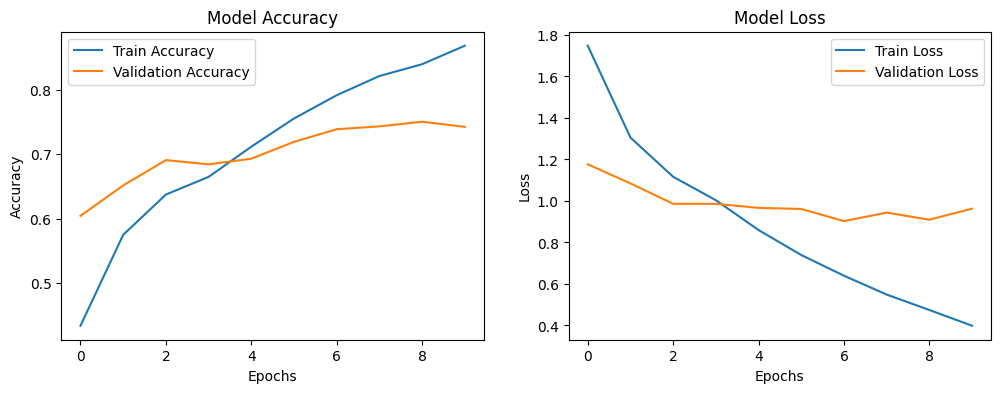

In [ ]:
# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    sandbox_dir,
    validation_split=0.2,
    subset="training",
    seed=1234,
    image_size=image_size,
    batch_size=batch_size
)

# Load validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    sandbox_dir,
    validation_split=0.2,
    subset="validation",
    seed=1234,
    image_size=image_size,
    batch_size=batch_size
)

# Get class names
class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# Normalize dataset
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (x / 255.0, y)).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (x / 255.0, y)).cache().prefetch(buffer_size=AUTOTUNE)

# Build the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Helps prevent overfitting
    layers.Dense(num_classes, activation='softmax')  # Multi-class classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 10  # Adjust epochs for better performance
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

# Plot training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()   

In [2]:
import numpy as np

# Load the saved features and labels
data = np.load("weather_features.npz")

# Extract X (features) and y (labels)
X = data["X"]
y = data["y"]

# Print shapes to verify
print("Loaded X shape:", X.shape)
print("Loaded y shape:", y.shape)

Loaded X shape: (6860, 2048)
Loaded y shape: (6860,)


Epoch 1/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4545 - loss: 1.7471 - val_accuracy: 0.8397 - val_loss: 0.4590
Epoch 2/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7847 - loss: 0.6324 - val_accuracy: 0.8528 - val_loss: 0.4164
Epoch 3/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8384 - loss: 0.4911 - val_accuracy: 0.8681 - val_loss: 0.3840
Epoch 4/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8535 - loss: 0.4240 - val_accuracy: 0.8717 - val_loss: 0.3828
Epoch 5/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8865 - loss: 0.3618 - val_accuracy: 0.8841 - val_loss: 0.3653
Epoch 6/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8915 - loss: 0.3234 - val_accuracy: 0.8776 - val_loss: 0.3787
Epoch 7/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9053 - loss: 0.2907 - val_accuracy: 0.8761 - val_loss: 0.3753
Epoch 8/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9086 - loss: 0.2880 - val_accuracy: 0.

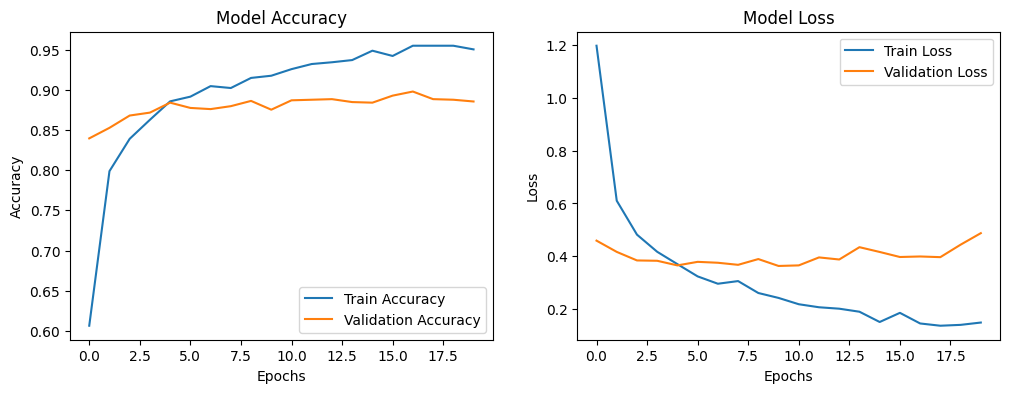

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


# Define input shape based on X dataset
input_shape = (2048,)  # Feature vector length

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1234)

# Convert labels to one-hot encoding for categorical loss
num_classes = len(set(y))  # Number of unique classes
y_train_one_hot = to_categorical(y_train, num_classes)
y_val_one_hot = to_categorical(y_val, num_classes)

# Build the Fully Connected Model
model = keras.Sequential([
    layers.Input(shape=input_shape),  # Input layer
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Regularization
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Output layer for multiclass classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 20
history = model.fit(X_train, y_train_one_hot, 
                    validation_data=(X_val, y_val_one_hot), 
                    epochs=epochs, 
                    batch_size=32)

# Plot training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [7]:
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.18.0


[]

In [12]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_val)
print("\nClassification Report:\n", classification_report(y_val, y_pred, target_names=class_names))

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets